# Court Case Hearing And Complexity Prediction

#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Loading Dataset

In [2]:
df = pd.read_csv('cases.csv')

In [3]:
df.head()

,Case_ID,No. of hearings,No. of advocates,No. of issues,No. of laws,No. of precedents,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,C001,3,3,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C002,4,3,3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C003,2,3,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C004,4,3,3,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C005,5,6,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(100, 13)

In [5]:
df.columns

Index(['Case_ID', 'No. of hearings ', 'No. of advocates', 'No. of issues',
       'No. of laws', 'No. of precedents', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [6]:
columns = ['Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12']
df.drop(columns, axis =1, inplace=True)

In [7]:
df

,Case_ID,No. of hearings,No. of advocates,No. of issues,No. of laws,No. of precedents
0,C001,3,3,2,2,0
1,C002,4,3,3,3,0
2,C003,2,3,3,1,0
3,C004,4,3,3,2,0
4,C005,5,6,2,1,0
...,...,...,...,...,...,...
95,C096,3,6,2,20,0
96,C097,4,6,2,11,0
97,C098,20,5,3,9,0
98,C099,3,3,2,8,0


#Visualizing Data

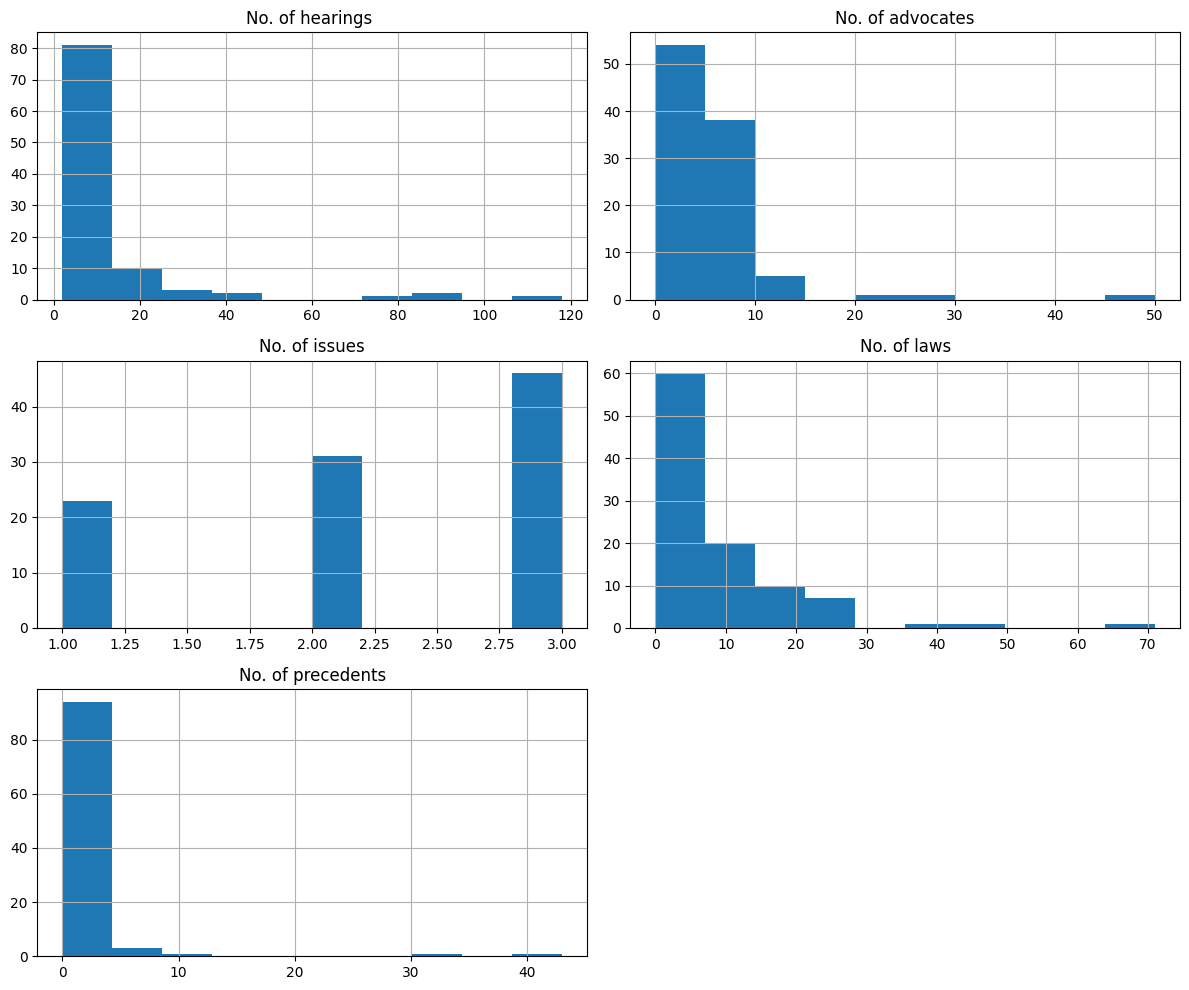

In [8]:
df.hist(figsize=(12, 10))
plt.tight_layout()

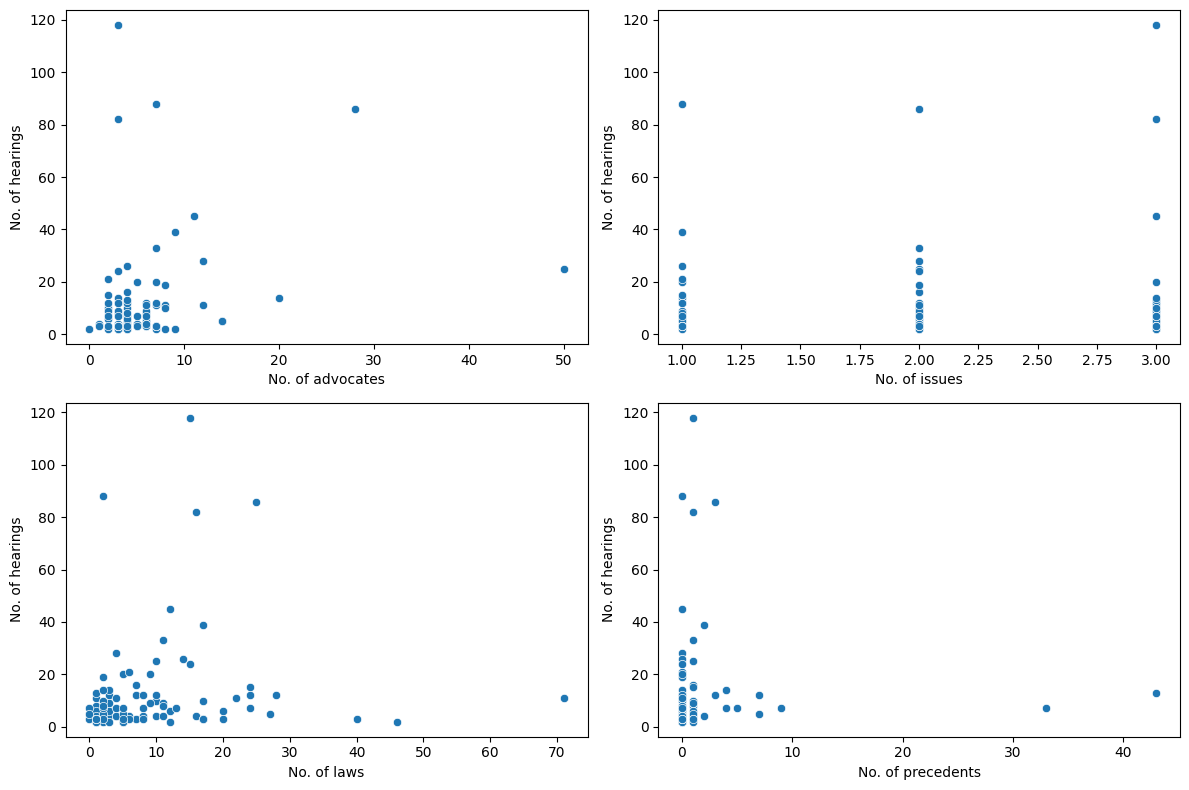

In [9]:
features = ['No. of advocates', 'No. of issues', 'No. of laws', 'No. of precedents']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df['No. of hearings '])
    plt.xlabel(feature)
    plt.ylabel('No. of hearings')

plt.tight_layout()

<AxesSubplot:>

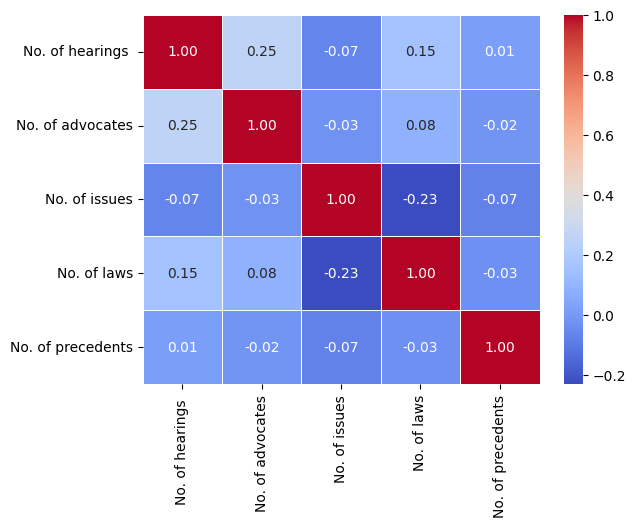

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

#Calculating case complexity

In [11]:
df['case_complexity'] = df['No. of issues']+df['No. of laws']+df['No. of precedents']

In [12]:
df['case_complexity'].describe()

count    100.000000
mean      12.430000
std       11.666455
min        1.000000
25%        5.000000
50%        8.000000
75%       15.000000
max       73.000000
Name: case_complexity, dtype: float64

In [13]:
#Standardizing the values of case complexity
from sklearn.preprocessing import StandardScaler

case_complexity_values = df['case_complexity'] 

# Reshape the data if it's a 1D array (a single column)
case_complexity_values = case_complexity_values.values.reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using standardization
case_complexity_standardized = scaler.fit_transform(case_complexity_values)

# Create a new column of DataFrame with the standardized column
df['case_complexity_standardized'] = pd.DataFrame(case_complexity_standardized, columns=['case_complexity_standardized'])
df['case_complexity_standardized'].describe()


count    1.000000e+02
mean     2.775558e-17
std      1.005038e+00
min     -9.846678e-01
25%     -6.400771e-01
50%     -3.816342e-01
75%      2.213995e-01
max      5.217964e+00
Name: case_complexity_standardized, dtype: float64

In [14]:
# Assuming standardized_case_complexity_df contains the standardized 'case_complexity' column

# Define the standard deviation and mean
std_dev = 1.005
mean_val = 2.775

# Define the classification ranges
hard_upper = mean_val + std_dev
slow_lower = mean_val - std_dev

# Classify the data into three groups based on the ranges
def classify_complexity(val):
    if val > hard_upper:
        return 'Hard'
    elif val < slow_lower:
        return 'Standard'
    else:
        return 'Intermediate'

# Apply the classification function to the standardized column and create a new 'classification' column
df['classification'] = df['case_complexity_standardized'].apply(classify_complexity)

In [15]:
df.classification.value_counts()

Standard        94
Intermediate     5
Hard             1
Name: classification, dtype: int64

In [16]:
df

,Case_ID,No. of hearings,No. of advocates,No. of issues,No. of laws,No. of precedents,case_complexity,case_complexity_standardized,classification
0,C001,3,3,2,2,0,4,-0.726225,Standard
1,C002,4,3,3,3,0,6,-0.553929,Standard
2,C003,2,3,3,1,0,4,-0.726225,Standard
3,C004,4,3,3,2,0,5,-0.640077,Standard
4,C005,5,6,2,1,0,3,-0.812372,Standard
...,...,...,...,...,...,...,...,...,...
95,C096,3,6,2,20,0,22,0.824433,Standard
96,C097,4,6,2,11,0,13,0.049104,Standard
97,C098,20,5,3,9,0,12,-0.037043,Standard
98,C099,3,3,2,8,0,10,-0.209339,Standard


#Spliting the training and testing data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = df[['No. of advocates', 'No. of issues', 'No. of laws', 'No. of precedents']]
y = df['No. of hearings ']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [20]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (80, 4)
y_train shape: (80,)
x_test shape: (20, 4)
y_test shape: (20,)


#Applying Models

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor(objective='reg:squarederror')
}

# Train and evaluate models
results = {'Model': [], 'Mean Squared Error': [], 'R-squared': []}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results['Model'].append(model_name)
    results['Mean Squared Error'].append(mse)
    results['R-squared'].append(r2)

In [23]:
results_df = pd.DataFrame(results)

In [24]:
print(results_df)

                     Model  Mean Squared Error  R-squared
0        Linear Regression          251.589281   0.206412
1  Decision Tree Regressor          143.556250   0.547180
2  Random Forest Regressor          236.077038   0.255342
3        XGBoost Regressor          227.486792   0.282438


In [25]:
best_model = models[results_df.loc[results_df['Mean Squared Error'].idxmin(), 'Model']]
print('Best Model as per mean squred error and r2 score:', results_df.loc[results_df['Mean Squared Error'].idxmin(), 'Model'])

Best Model as per mean squred error and r2 score: Decision Tree Regressor


#Improving accuracy of model

In [26]:
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [27]:
gbm = xgb.XGBRegressor()
reg_cv = GridSearchCV(gbm, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
reg_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...elta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                 

In [28]:
reg_cv.best_params_

{'colsample_bytree': 1.0,
 'max_depth': 4,
 'min_child_weight': 1.2,
 'n_estimators': 500}

In [29]:
gbm = xgb.XGBRegressor(**reg_cv.best_params_)
gbm.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1.2,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [30]:
predictions = gbm.predict(x_test)
predictions

array([11.050357 , 16.797152 ,  1.0865889, 32.39302  , 37.289104 ,
       -2.539323 , 20.056417 , 19.059574 ,  2.4575129, 12.973514 ,
        2.4575129, -1.2131261, 12.164155 ,  5.430204 , -1.8954879,
        5.663839 ,  4.1293883, 35.945    ,  3.9625857, 10.400163 ],
      dtype=float32)

In [31]:
gbm.score(x_test,y_test)

0.24559559461086633

In [32]:
gbm.score(x_train,y_train)

0.9966557217353564

In [33]:
from sklearn.metrics import r2_score
r2 = np.sqrt(r2_score(y_test, predictions))
print("r2 : % f" %(r2))

r2 :  0.495576


In [34]:
new_data = [14,3,27,0]
new_data_arr = np.asarray([new_data])

In [35]:
yhat = gbm.predict(new_data_arr)
yhat

array([5.000358], dtype=float32)

#xgbregressor is giving more accurate results in comparision to the best model(as per r2_score and mean_squared_error).
#hence we would use xgbregressor as our final model 

In [36]:
import pickle
with open('XGBRegressor_model.pkl','wb') as file:
    pickle.dump(gbm,file)